# Trabajo final diplomatura Data Science
---

## Fake News en Español

Nos proponemos realizar un analisis sobre noticias falsas usando bases de datos ya confeccionadas, realizando el analisis exploratorio necesario para conseguir un dataframe suficientemente grande y consistente para luego poder aplicar los distintos modelos de aprendizaje supervizado que hemos aprendido.
Una vez realizado los distintos modelos realizaremos webscraping a distintas paginas de noticias para probar los mismos y ver que modelo de los entrenados nos entrega mejores resultados

### Importamos las librerias necesarias para el analisis exploratorio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import pydotplus
import string
import nltk
from six import StringIO
from IPython.display import Image
# from pydotplus import graph_from_dot_data
from nltk.corpus import stopwords, wordnet
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer,SnowballStemmer
from nltk.probability import FreqDist
from nltk import word_tokenize
from string import punctuation
import mtbpy
from wordcloud import WordCloud
import re
# from pandas_profiling import ProfileReport
#%matplotlib inline
#nltk.download('all')

### Importamos el dataset
Nuestros datos se encuentran en un archivo txt y los valores estan separados por tabulaciones, tambien necesitamos especificar la codificacion para no tener problemas con los acentos y ñ por ejemplo

In [2]:
df = pd.read_csv('fakeNews.txt',encoding='latin-1',delimiter='\t')
df.head()

,Class,Text
0,True,Algunas de las voces extremistas más conocidas...
1,True,Después de casi dos años y medio de luchas pol...
2,True,Dos periodistas birmanos de la agencia Reuters...
3,True,El Cuerpo Nacional de Policía ha detenido a cu...
4,True,El desfile de la firma en Roma se convierte en...


### Realizaremos un analisis exploratorio para entender el dataset

NICO:  
Como el dataset es solo texto, no vas a tener basicamente nada de analysis exploratorio, usar head, tail, info, o describe solo te va a ensuciar el notebook por que no vas a ver nada, yo pasaria directamente al pre procesamiento del texto sin usar estas funciones, lo mismo con el pandas profile, para este caso no te sirve de nada..

#### Imprimimos la informacion de los datos categoricos y aqui vemos por primera vez que tenemos datos dupicados

In [3]:
df.describe(include=['O'])

,Text
count,3568
unique,3518
top,Las autoridades suecas creen que con un día la...
freq,3


In [4]:
df.duplicated().sum()

50

### Una vez que ya vimos y entendimos el dataframe, empezamos a realizar la limpieza y transformacion del mismo

#### Borramos los registros dupicados

In [5]:
df.drop_duplicates('Text', inplace=True)

#### Para limpiar y tokenizar a mismo tiempo podemos usar esta funcion

In [6]:
def limpiar_tokenizar(texto):

    #-----------------------------------------#
    # Funcion para procesar y limpiar texto
    #-----------------------------------------#

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\¡\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = word_tokenize(nuevo_texto)
    
    stop_words = set(stopwords.words('spanish'))
    # Remove Stop Words
    nuevo_texto = [word for word in nuevo_texto if not word in stop_words]
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return(nuevo_texto)

El Stemmer y Lemmataizer no funionan bien en español, y palabras que pueden ser claves las deforma, asi que a tomar por culo los dos, mejor no usarlos

In [7]:
stemmer = SnowballStemmer('spanish', ignore_stopwords=True)
stemmer.stem('Roma')

'rom'

In [8]:
lemma = WordNetLemmatizer()
lemma.lemmatize('dos')

'do'

## Final Dataframe
Esto es todo lo que necesitas, a partir de aca ya podes modelar solo con clean_text y class

In [9]:
df['clean_text'] = df.Text.apply(limpiar_tokenizar)
df['clean_text'] = df['clean_text'].astype('str')
df['Class'] = df['Class'].astype('int')
df.head()

,Class,Text,clean_text
0,1,Algunas de las voces extremistas más conocidas...,"['voces', 'extremistas', 'conocidas', 'ee', 'u..."
1,1,Después de casi dos años y medio de luchas pol...,"['después', 'casi', 'dos', 'años', 'medio', 'l..."
2,1,Dos periodistas birmanos de la agencia Reuters...,"['dos', 'periodistas', 'birmanos', 'agencia', ..."
3,1,El Cuerpo Nacional de Policía ha detenido a cu...,"['cuerpo', 'nacional', 'policía', 'detenido', ..."
4,1,El desfile de la firma en Roma se convierte en...,"['desfile', 'firma', 'roma', 'convierte', 'oda..."


### Analisis de frecuencia de palabras
Esto lo veo un poco innecesario ya que las palabras al final no son datos aislados, sino que pertenecen a un contexto, poca frequencia no significa que pueda ser importante para el modelo, pero tambien es cuestion de probar, podes correr un modelo con y sin palabras de baja frequencia para ver si mejora o no. Salvo que quieras mostrarle al profe que sabes usarlo, yo lo haria con word2vec  
Lo mismo con las nubes de palabras, se que parecen bonitas, pero no te aporta ninguna informacion ni para el pre processing ni para el modelado. Tenes 3500 noticias que tampoco sabes de lo que hablan, si en la nube de palabra te sale grande mexico... que hacemos? podemos asumir que la mayoria de las noticias son de ahi o algo pasa en mexico... pero al final es informacion sin utilidad cuando queremos predecir.   
Este tipo de herramientas son utiles cuando haces un analysis exploratorio o analysis de sentimientos para reviews, twitter, branding, etc... te da una idea de que se esta hablando o que es lo que dice/piensa la gente sobre una marca, producto, etc..

Para este proyecto solo veo 2 pasos:
- limpiar y tokenizar el texto
- Prediccion 

Si no tenes analisis exploratorio, ni vas a ver la parte de frequencias de palabras y eso, como te podes lucir con el codigo??
- crea funciones de pre processamiento de texto que puedas tunear y agregar en un pipeline 
- crea funciones para la evaluacion y visualizacion del modelo 
- tunea muy bien todos los hiper parametros del modelo (grid search, random search)
- tirate una red neuronal.... 

### Modelado
En esta etapa ya solo usaremos las columnas Class y clean_text  

Lo primero antes de empezar a pensar que tipo de modelo vas a usar es crear un baseline, la prediccion mas facil y pedorra que podes hacer (podrias utilizar la media como baseline).  
Otra parte importante es definir de antemano que metricas vas a utilizar. Ya sabemos que es un problema de clasificacion, pero necesitamos tener un modelo que sea bueno identificando solo las fakes news o ambas(las fakes y las no fakes)?  
La metrica mas importante va a ser el recall? el accurancy? queremos tener un modelo mas balanceado y solo trabajar con el F1? 

### Importamos las librerias para el modelado y el analisis de metricas

In [27]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score, roc_curve, auc, plot_roc_curve, classification_report


def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_prob_train = model.predict_proba(X_train)[:, 1]
    y_prob_test = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Precision': [
            precision_score(y_train, y_pred_train, pos_label=1),
            precision_score(y_test, y_pred_test, pos_label=1)
        ],
        'Recall': [
            recall_score(y_train, y_pred_train, pos_label=1),
            recall_score(y_test, y_pred_test, pos_label=1)
        ],
        'F1': [
            f1_score(y_train, y_pred_train, pos_label=1),
            f1_score(y_test, y_pred_test, pos_label=1)
        ],
        'Accuracy': [
            accuracy_score(y_train, y_pred_train),
            accuracy_score(y_test, y_pred_test)
        ],
        'MCC': [
            matthews_corrcoef(y_train, y_pred_train),
            matthews_corrcoef(y_test, y_pred_test)
        ],
        'Roc-Auc': [
            roc_auc_score(y_train, y_prob_train),
            roc_auc_score(y_test, y_prob_test)
        ]
    }

    display(pd.DataFrame(metrics, index=['Train set', 'Test set']))

    cf_matrix = confusion_matrix(y_test, y_pred_test)

    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = [
        '{0:.2%}'.format(value)
        for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train, pos_label=1)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_val, tpr_val, _ = roc_curve(y_test, y_prob_test, pos_label=1)
    roc_auc_val = auc(fpr_val, tpr_val)

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    sns.heatmap(cf_matrix,
                annot=labels,
                cmap='Blues',
                fmt='',
                xticklabels=categories,
                yticklabels=categories,
                ax=ax[0])

    ax[0].set_xlabel("Predicted values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_ylabel("Actual values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_title("Confusion Matrix", fontdict={'size': 16}, pad=20)

    ax[1].plot(fpr_train,
               tpr_train,
               color='red',
               label='ROC curve Train (area = %0.3f)' % roc_auc_train)
    ax[1].plot(fpr_val,
               tpr_val,
               color='blue',
               label='ROC curve Test (area = %0.3f)' % roc_auc_val)
    ax[1].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    ax[1].set_xlabel('False Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_ylabel('True Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_xlim([0, 1])
    ax[1].set_ylim([0, 1])
    ax[1].set_title('ROC Curve', fontdict={'size': 16}, pad=20)
    ax[1].legend(loc="lower right")
    ax[1].grid()

    plt.show()

### Seleccionamos nuestra variable independiente y nuestro target

In [12]:
x = df.clean_text
y = df.Class

In [22]:
# Chequear si hay balance entre positivos y negativos
y.sum() / len(y)

0.5164866401364412

### Dividimos nuestro dataset en train y test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Vectorizamos nuestros textos

In [14]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Baseline Model
El primer modelo que usaremos sera regresion logistica

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.957133,0.978767,0.967829,0.966240,0.932582,0.991959
Test set,0.796748,0.823529,0.809917,0.803977,0.608039,0.877057


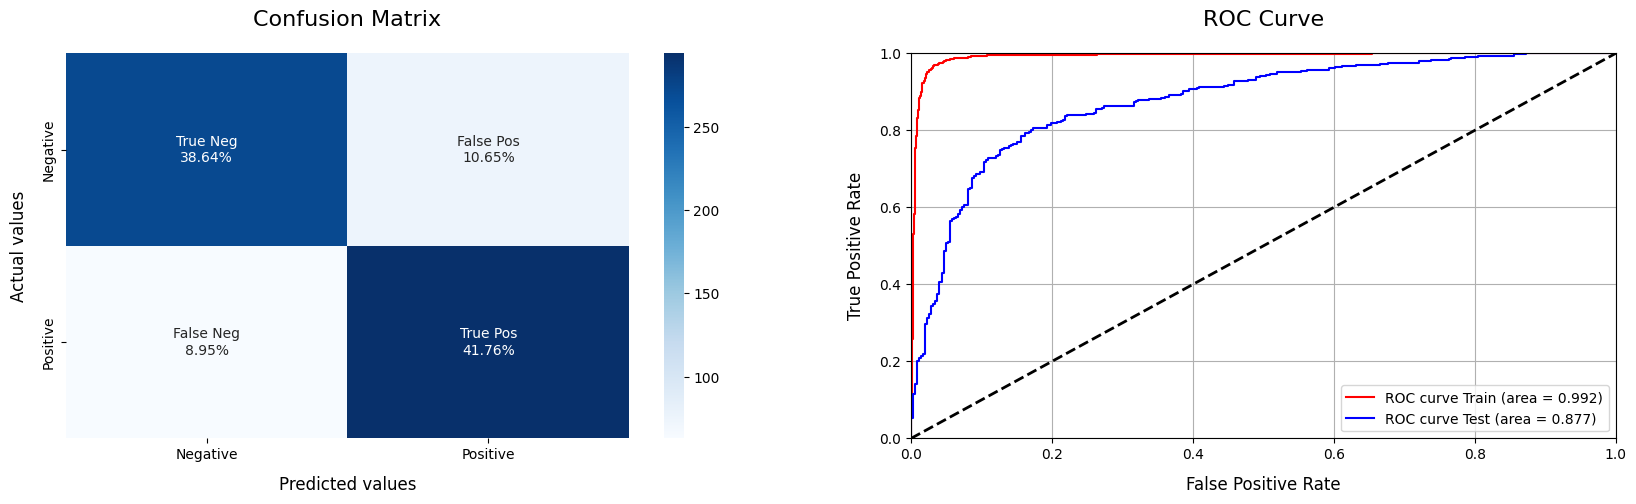

In [17]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

evaluate_model(LR, xv_train, y_train, xv_test, y_test)

In [33]:
model_DT = RandomForestClassifier(random_state=0, n_jobs=-1)
model_DT.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Model with rank: 1
Mean validation score: 0.748 (std: 0.018)
Parameters: {'max_depth': 14, 'n_estimators': 150}

Model with rank: 2
Mean validation score: 0.745 (std: 0.022)
Parameters: {'max_depth': 13, 'n_estimators': 150}

Model with rank: 3
Mean validation score: 0.741 (std: 0.021)
Parameters: {'max_depth': 14, 'n_estimators': 100}



,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.864236,0.941781,0.901344,0.893035,0.788470,0.967961
Test set,0.707838,0.834734,0.766067,0.741477,0.489719,0.839771


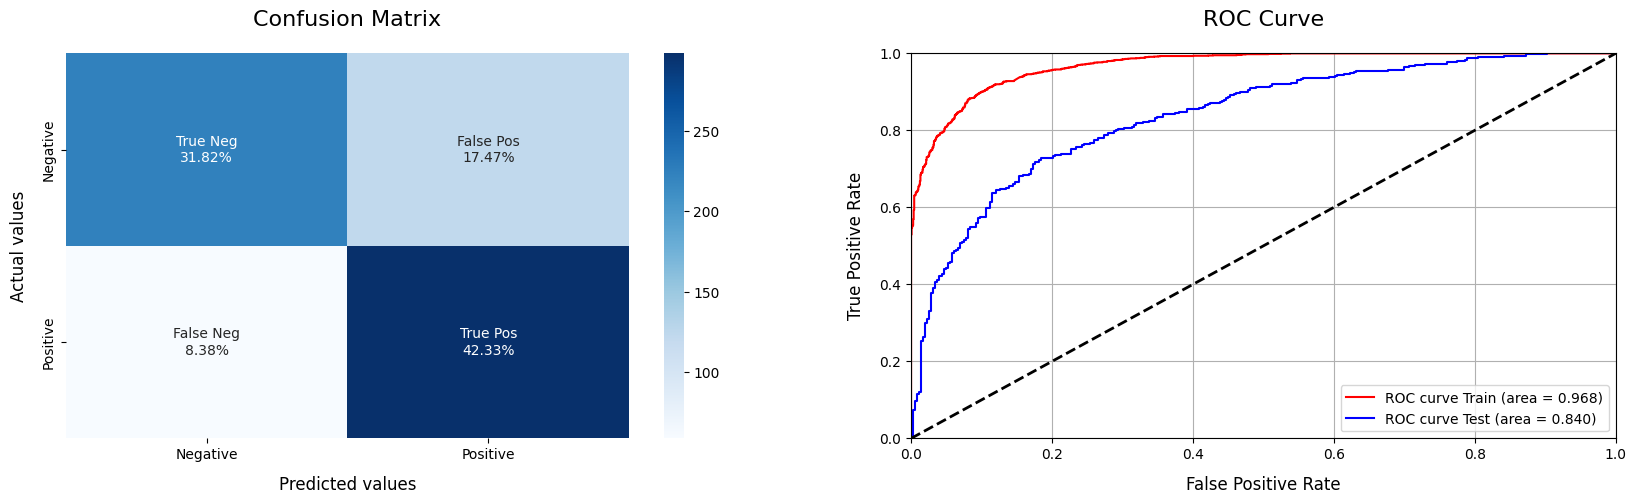

In [35]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results["mean_test_score"][candidate],
                results["std_test_score"][candidate],
            ))
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")


param = {'max_depth': list(range(1, 15)),
         'n_estimators': [50,100,150]
         }

grid = GridSearchCV(model_DT,
                    param_grid=param,
                    )

grid.fit(xv_train, y_train)

report(grid.cv_results_)

evaluate_model(grid, xv_train, y_train, xv_test, y_test)

In [36]:
grid.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=150, n_jobs=-1,
                       random_state=0)

### Word2vec

In [37]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=x_train, vector_size=100)
wv = word2vec.wv

In [38]:
print('Vocabulary size', len(wv.key_to_index))

diff_words = set([_ for elt in x_train for _ in elt])
print('Number of different words in the train set', len(diff_words))

Vocabulary size 52
Number of different words in the train set 63


In [39]:
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])

    return np.array(embedded_sentence)


def embedding(word2vec, sentences):
    embed = []

    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)

    return embed


x_train = embedding(word2vec, x_train)
x_test = embedding(word2vec, x_test)

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(x_train,
                            dtype='float32',
                            padding='post',
                            maxlen=20)

X_test_pad = pad_sequences(x_test, dtype='float32', padding='post', maxlen=20)


2022-12-17 12:06:38.263850: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import tensorflow as tf
from keras import backend as K


def init_model():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(100, activation='tanh'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['AUC'])

    return model


model = init_model()

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train_pad,
          y_train,
          batch_size=16,
          epochs=50,
          validation_data=(X_test_pad, y_test),
          callbacks=[es])

Epoch 1/50
176/176 [==============================] - 11s 21ms/step - loss: 0.6978 - auc: 0.4965 - val_loss: 0.6930 - val_auc: 0.5138
Epoch 2/50
176/176 [==============================] - 2s 12ms/step - loss: 0.6918 - auc: 0.5247 - val_loss: 0.6905 - val_auc: 0.5387
Epoch 3/50
176/176 [==============================] - 2s 12ms/step - loss: 0.6853 - auc: 0.5520 - val_loss: 0.6807 - val_auc: 0.5378
Epoch 4/50
176/176 [==============================] - 2s 12ms/step - loss: 0.6775 - auc: 0.5577 - val_loss: 0.6756 - val_auc: 0.5492
Epoch 5/50
176/176 [==============================] - 2s 12ms/step - loss: 0.6773 - auc: 0.5582 - val_loss: 0.6783 - val_auc: 0.5353
Epoch 6/50
176/176 [==============================] - 2s 12ms/step - loss: 0.6733 - auc: 0.5758 - val_loss: 0.6782 - val_auc: 0.5563
Epoch 7/50
176/176 [==============================] - 2s 12ms/step - loss: 0.6717 - auc: 0.5672 - val_loss: 0.6743 - val_auc: 0.5633
Epoch 8/50
176/176 [==============================] - 2s 12ms/step -

In [49]:
# Esta funcion es la misma que antes pero hay que hacerle unas modificaciones para trabajar con tensorflow...

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score, roc_curve, auc, plot_roc_curve, classification_report


def evaluate_model_NN(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_prob_train = model.predict(X_train).ravel()
    y_prob_test = model.predict(X_test).ravel()

    metrics = {
        'Precision': [
            precision_score(y_train, y_pred_train.ravel().round(),
                            pos_label=1),
            precision_score(y_test, y_pred_test.ravel().round(), pos_label=1)
        ],
        'Recall': [
            recall_score(y_train, y_pred_train.ravel().round(), pos_label=1),
            recall_score(y_test, y_pred_test.ravel().round(), pos_label=1)
        ],
        'F1': [
            f1_score(y_train, y_pred_train.ravel().round(), pos_label=1),
            f1_score(y_test, y_pred_test.ravel().round(), pos_label=1)
        ],
        'Accuracy': [
            accuracy_score(y_train,
                           y_pred_train.ravel().round()),
            accuracy_score(y_test,
                           y_pred_test.ravel().round())
        ],
        'MCC': [
            matthews_corrcoef(y_train,
                              y_pred_train.ravel().round()),
            matthews_corrcoef(y_test,
                              y_pred_test.ravel().round())
        ],
        'Roc-Auc': [
            roc_auc_score(y_train, y_prob_train),
            roc_auc_score(y_test, y_prob_test)
        ]
    }

    display(pd.DataFrame(metrics, index=['Train set', 'Test set']))

    cf_matrix = confusion_matrix(y_test, y_pred_test.ravel().round())

    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = [
        '{0:.2%}'.format(value)
        for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train, pos_label=1)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_val, tpr_val, _ = roc_curve(y_test, y_prob_test, pos_label=1)
    roc_auc_val = auc(fpr_val, tpr_val)

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    sns.heatmap(cf_matrix,
                annot=labels,
                cmap='Blues',
                fmt='',
                xticklabels=categories,
                yticklabels=categories,
                ax=ax[0])

    ax[0].set_xlabel("Predicted values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_ylabel("Actual values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_title("Confusion Matrix", fontdict={'size': 16}, pad=20)

    ax[1].plot(fpr_train,
               tpr_train,
               color='red',
               label='ROC curve Train (area = %0.3f)' % roc_auc_train)
    ax[1].plot(fpr_val,
               tpr_val,
               color='blue',
               label='ROC curve Test (area = %0.3f)' % roc_auc_val)
    ax[1].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    ax[1].set_xlabel('False Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_ylabel('True Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_xlim([0, 1])
    ax[1].set_ylim([0, 1])
    ax[1].set_title('ROC Curve', fontdict={'size': 16}, pad=20)
    ax[1].legend(loc="lower right")
    ax[1].grid()

    plt.show()

22/22 [==============================] - 0s 9ms/step


,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.541284,0.929452,0.684144,0.554726,0.128399,0.594210
Test set,0.530547,0.924370,0.674157,0.546875,0.129152,0.565475


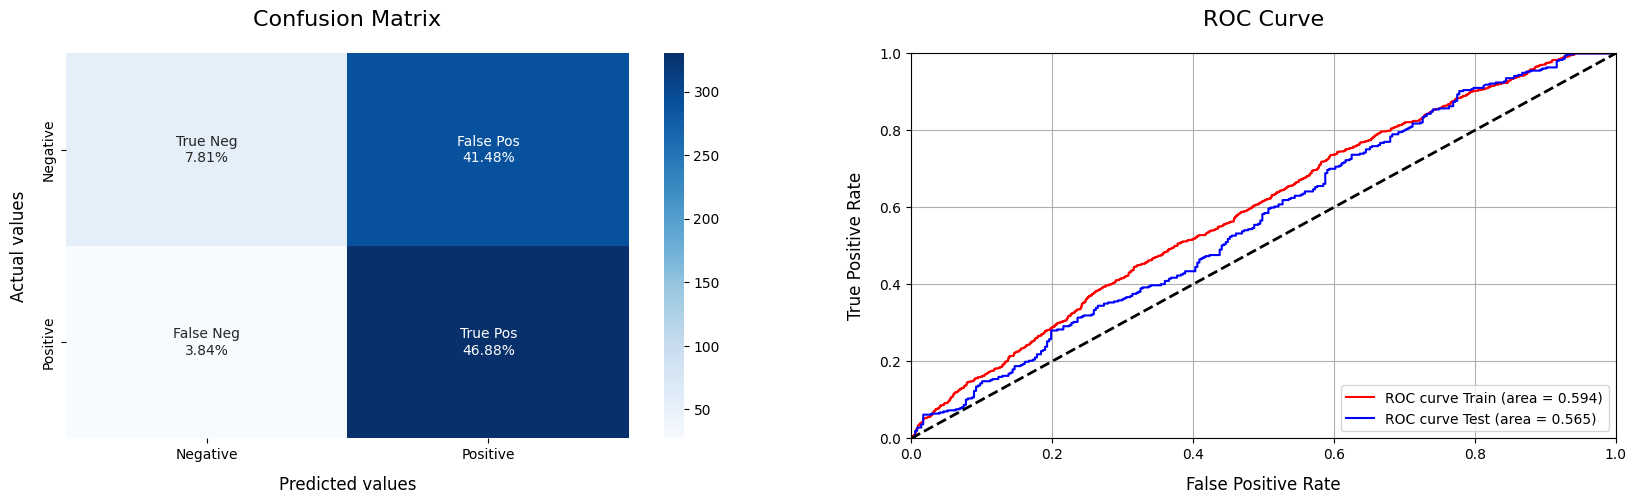

In [50]:
evaluate_model_NN(model, X_train_pad, y_train, X_test_pad, y_test)